In [43]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install numpy


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# --- IGNORE ---

In [45]:
df = pd.read_csv('../data/raw/Adcampaign.csv')
df.head()

,Month,No. of Adverts (X),No. of bookings (Y)
0,1,20,61
1,2,24,77
2,3,30,72
3,4,23,66
4,5,27,85


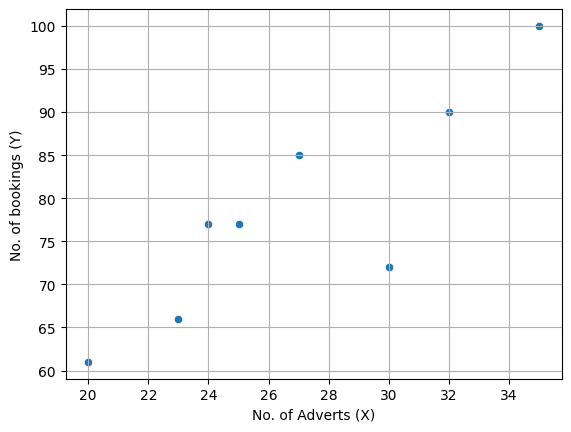

In [46]:
sns.scatterplot(data = df, x = 'No. of Adverts (X)', y = 'No. of bookings (Y)')
plt.grid()

<Axes: xlabel='No. of Adverts (X)', ylabel='No. of bookings (Y)'>

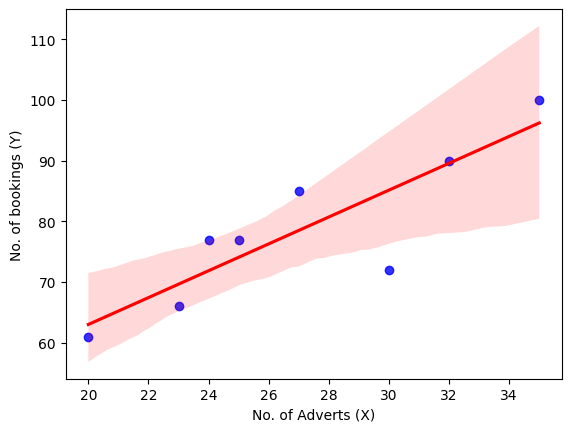

In [47]:
sns.regplot(data = df, x = 'No. of Adverts (X)', y = 'No. of bookings (Y)', ci=95, scatter_kws={"color":"blue"}, line_kws={"color":"red"})

In [48]:
df.rename(columns={'No. of Adverts (X)': 'Adverts', 'No. of bookings (Y)': 'Bookings'}, inplace=True)

In [49]:
df['Adverts'].ndim

1

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [57]:
y_pred = model.predict(X)

print(y_pred)

[62.98863636 71.85227273 85.14772727 69.63636364 78.5        74.06818182
 89.57954545 96.22727273]


In [55]:
model.predict([[26]])

e:\Data Mining & Analysis\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([76.28409091])

In [ ]:
#absolute error

In [63]:
print(model.coef_)
print(model.intercept_)

[2.21590909]
18.670454545454547


In [64]:
print(f"r_squared: {r2_score(y, y_pred)}")

r_squared: 0.7541051880057117


In [68]:
import pandas as pd
#import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'statsmodels'

In [67]:
formula_str="Y~0+X"
print(df)
result=sm.ols(formula=formula_str,data=df).fit()
print(result.summary())

   Month  Adverts  Bookings
0      1       20        61
1      2       24        77
2      3       30        72
3      4       23        66
4      5       27        85
5      6       25        77
6      7       32        90
7      8       35       100


NameError: name 'sm' is not defined